OBJETIVO: Analizar el tiempo en que un estudiante demora en pasar todas la materias de cursos básicos.
Grupo de Analisis: alumnos de mecatronica 

# PROCESAMIENTO DE DATOS

In [89]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
lectura= pd.read_csv("datosConcatenadossinCI.csv")
pd.set_option('display.max_columns', None) #para ver todas las columnas, solo se usa una vez
pd.set_option('display.max_rows', None) #para ver todas las filas

In [91]:
lectura.head()

,Unnamed: 0,danho,ciclo,Cod.Asign,Asignatura,Cod.Car.Sec,Cod.Curso,Convocatoria,Anho,Semestre,Aprobado,Anho.Firma,Primer.Par,Segundo.Par,AOT,Primer.Rec,Segundo.Rec,Nota.Final,Tercer.Par,Asis,Cuarto.Par,4P_60,id_anony
0,0,2012,1,2402,COMBUSTION,INT9MECANI,13,1,2012,1,N,0,0,0,0,0,0,NaN,0.0,1.0,NaN,NaN,es_0
1,1,2012,1,2402,COMBUSTION,MEC9-OPT,13,1,2012,1,S,2012,11,14,8,0,0,1F-5,0.0,1.0,NaN,NaN,es_1
2,2,2012,1,2402,COMBUSTION,INT9MECANI,13,1,2012,1,S,2012,24,23,9,0,0,1F-5,0.0,1.0,NaN,NaN,es_2
3,3,2012,1,2402,COMBUSTION,MEC9-OPT,13,1,2012,1,S,2012,11,14,8,0,0,"1F-1,2F-2",0.0,1.0,NaN,NaN,es_3
4,4,2012,1,2402,COMBUSTION,MEC9-OPT,13,1,2012,1,N,0,11,4,8,0,0,NaN,0.0,1.0,NaN,NaN,es_4


In [92]:
lectura.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221822 entries, 0 to 221821
Data columns (total 23 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    221822 non-null  int64  
 1   danho         221822 non-null  int64  
 2   ciclo         221822 non-null  int64  
 3   Cod.Asign     221822 non-null  int64  
 4   Asignatura    221822 non-null  object 
 5   Cod.Car.Sec   221822 non-null  object 
 6   Cod.Curso     221822 non-null  int64  
 7   Convocatoria  221822 non-null  int64  
 8   Anho          221822 non-null  int64  
 9   Semestre      221822 non-null  int64  
 10  Aprobado      221822 non-null  object 
 11  Anho.Firma    221822 non-null  int64  
 12  Primer.Par    221822 non-null  int64  
 13  Segundo.Par   221822 non-null  int64  
 14  AOT           221822 non-null  int64  
 15  Primer.Rec    221822 non-null  int64  
 16  Segundo.Rec   221822 non-null  int64  
 17  Nota.Final    137062 non-null  object 
 18  Terc

In [93]:
np.unique(lectura["Cod.Car.Sec"])

array(['CGF-175-09', 'CGF-PLS09 ', 'CGF-PLS13 ', 'CIV-175-09',
       'CIV-PLS09 ', 'CIV-PLS13 ', 'ECA-175-09', 'ECA-PLS09 ',
       'ECA-PLS13 ', 'ECA9-OPT  ', 'ELE-175-09', 'ELE-PLS09 ',
       'ELE-PLS13 ', 'IND-175-09', 'IND-PLS09 ', 'IND-PLS13 ',
       'INT9-PROYT', 'INT9CONSTR', 'INT9ELECTR', 'INT9G-ECO ',
       'INT9MECANI', 'INT9ORTERR', 'INT9RNYMA ', 'INT9SANEHI',
       'INT9SDIGYT', 'INT9TRANSP', 'MCT-175-09', 'MCT-PLS09 ',
       'MCT-PLS13 ', 'MCT9-OPT  ', 'MEC-175-09', 'MEC-PLS09 ',
       'MEC-PLS13 ', 'MEC9-OPT  ', 'TIVAS     '], dtype=object)

In [94]:
carrera=pd.DataFrame(columns=lectura.columns) # carrera es un dataframe
for car in ['MCT-175-09', 'MCT-PLS09 ','MCT-PLS13 ', 'MCT9-OPT  ']:
     carrera=pd.concat([carrera, lectura[lectura["Cod.Car.Sec"]==car]], axis=0)

In [95]:
np.unique(carrera["Cod.Car.Sec"])


array(['MCT-175-09', 'MCT-PLS09 ', 'MCT-PLS13 ', 'MCT9-OPT  '],
      dtype=object)

In [96]:
allasig= np.unique(carrera['Asignatura']) 
print(allasig)


['ACTUADORES Y MAQ. ELECTRICAS 1' 'ACTUADORES Y MAQUINAS ELECTRICAS'
 'ALGEBRA LINEAL 1' 'ALGEBRA LINEAL 2' 'ALGORITMOS' 'ALGORITMOS 1'
 'ALGORITMOS 2' 'AUTOMOTORES' 'BASE DE DATOS' 'CALCULO 1' 'CALCULO 2'
 'CALCULO 3' 'CALCULO 5' 'COMPUTACION' 'CONTABILIDAD Y FINANZAS'
 'CONTROL NUMERICO COMPUTARIZADO' 'CONTROLADORES LOGICOS'
 'DIBUJO MECANICO' 'DIBUJO TECNICO' 'DINAMICA' 'DISEÑO LOGICO DIGITAL'
 'DOMOTICA' 'ELECTRICIDAD Y CIRCUITOS ELECTRICOS' 'ELECTROMAGNETISMO 1'
 'ELECTRONICA 1' 'ELECTRONICA 2' 'ELEMENTOS DE MAQUINAS' 'ESTATICA'
 'FENOMENOS DE TRANSPORTE' 'FISICA 1' 'FISICA 2' 'FISICA 3'
 'FISICA DE SEMICONDUCTORES' 'FORMULACION Y GESTION DE PROYECTOS'
 'FUNDAMENTOS DE ELECTRONICA INDUSTRIAL' 'GEOMETRIA ANALITICA'
 'GEOMETRIA DESCRIPTIVA' 'GEST. DE CALIDAD E IMPACTO AMBIENTAL'
 'GESTION DE LA CALIDAD Y MEDIO AMBIENTE' 'GESTION DE PROYECTOS'
 'INMOTICA Y DOMOTICA' 'INSTR. PARA CONTROL Y AUTOM.'
 'INSTRUMENTOS PARA CONTROL Y AUTOMATIZACION'
 'INT. A LA PROGRAMACION DE CNC' 'INTELIGE

tengo que eliminar las materias que no correponden a cursos basicos de un mecatronico

In [97]:
asig_mct_cb=['ALGEBRA LINEAL 1','ALGEBRA LINEAL 2','CALCULO 1', 'CALCULO 2','CALCULO 3','COMPUTACION','PROGRAMACION ORIENTADA A OBJETOS','DIBUJO TECNICO', 'DINAMICA', 'ELECTRICIDAD Y CIRCUITOS ELECTRICOS', 'ELECTROMAGNETISMO 1','ESTATICA','FISICA 1', 'FISICA 2','FISICA 3', 'FISICA DE SEMICONDUCTORES', 'GEOMETRIA ANALITICA','GEOMETRIA DESCRIPTIVA','METODOS NUMERICOS','PROBABILIDAD Y ESTADISTICA','PROBABILIDAD Y ESTADISTICA ','QUIMICA GENERAL','TEORIA DE CIRCUITOS']

In [98]:
len(asig_mct_cb) 


23

OBSERVACIONES: Proba se repite 2 veces y en la malla 2013 se cambio "Elec. y circ. eléctricos" por "Electromagnetismo". 
En la malla 2009 hay 20 materias en cb y en la malla 2013 hay 21.

In [99]:
carrerafiltrada=pd.DataFrame(columns=carrera.columns) # carrerafiltrada es un dataframe con los alumnos de cursos basicos 
for car in asig_mct_cb:
     carrerafiltrada=pd.concat([carrerafiltrada, carrera[carrera["Asignatura"]==car]], axis=0)

In [100]:
carrerafiltrada.head()

,Unnamed: 0,danho,ciclo,Cod.Asign,Asignatura,Cod.Car.Sec,Cod.Curso,Convocatoria,Anho,Semestre,Aprobado,Anho.Firma,Primer.Par,Segundo.Par,AOT,Primer.Rec,Segundo.Rec,Nota.Final,Tercer.Par,Asis,Cuarto.Par,4P_60,id_anony
14982,7551,2012,2,9004,ALGEBRA LINEAL 1,MCT-PLS09,1,1,2012,2,S,2011,0,0,0,0,0,1F-2,0.0,0.0,NaN,NaN,es_1116
14984,7553,2012,2,9004,ALGEBRA LINEAL 1,MCT-PLS09,1,1,2012,2,S,2012,4,28,9,0,0,1F-2,0.0,1.0,NaN,NaN,es_1119
14990,7559,2012,2,9004,ALGEBRA LINEAL 1,MCT-PLS09,1,1,2012,2,N,0,0,0,6,0,0,NaN,0.0,1.0,NaN,NaN,es_1510
14991,7560,2012,2,9004,ALGEBRA LINEAL 1,MCT-PLS09,1,1,2012,2,S,2012,14,28,9,0,0,1F-3,0.0,1.0,NaN,NaN,es_1127
14999,7568,2012,2,9004,ALGEBRA LINEAL 1,MCT-PLS09,1,1,2012,2,N,0,10,2,9,0,0,NaN,0.0,1.0,NaN,NaN,es_1514


In [101]:
carrcarrerafiltrada= carrerafiltrada.replace(['ELECTRICIDAD Y CIRCUITOS ELECTRICOS'],'ELECTROMAGNETISMO 1')
carrerafiltrada= carrerafiltrada.replace(['PROBABILIDAD Y ESTADISTICA ' ],'PROBABILIDAD Y ESTADISTICA')
materias=np.unique(carrerafiltrada['Asignatura']) 


In [102]:
cant=np.unique(carrerafiltrada['id_anony']) #esto es para saber la cantidad de alumnos que hay
print(len(cant)) #esta es la cantidad de alumnos que cursan o cursaron cursos basicos

632


In [103]:
#esto sirve para descargar en excel 
#from google.colab import files
#carrerafiltrada.to_csv('carrerafiltrada.csv')
#files.download('carrerafiltrada.csv')

La idea es crear un  nuevo DataFrame con los alumnos de mct que cursan cb teniendo como datos el numero de veces que recursaron y la cantidad de materias que pasaron.

In [104]:
  materiaspaso=[] #Cantidad de materias que ya aprobo
  pasoCB=[] # 1 si ya aprobo CB, 0 si aun no
  tardocb=[] # Cantidad de años que tardo o esta tardando 
  danhoini=[] # Año que curso
  id=[] #Alumnos
  codcarsec=[] # Codigo de Carrera
  anhofin=[] #Año que finalizo
  recursadas=[] #Cantidad de veces que recurso

In [105]:
for alum in cant:
  paso = 0
  recurso = 0
  pasCB=0
  aux= carrerafiltrada[carrerafiltrada['id_anony']==alum]
  plan= np.unique(aux['Cod.Car.Sec'])
  aux2= aux[aux['Aprobado']=='S']
  aux2=aux2.drop_duplicates(subset=['Asignatura'])# elimine las filas repetidas con misma Asignatura
  paso= len(aux2['Aprobado'])
  aux3=aux[aux['Aprobado']=='N']
  aux3=aux3.drop_duplicates(subset=['Asignatura','Anho','ciclo','danho'])#elimine filas con mismo Anho,danho,Asignatura y ciclo
  recurso= len(aux3['Aprobado'])
  tardo = aux['Anho'].max() - aux['danho'].min() #es lo que tardo o esta tardando en pasar
  if plan[0] == 'MEC-PLS13' and paso>20:
    pasCB=1
  if plan[0]!='MEC-PLS13' and paso>19:
    pasCB=1
  materiaspaso.append(paso)
  tardocb.append(tardo)
  danhoini.append(aux['danho'].min())
  id.append(alum)
  codcarsec.append(plan[0])
  anhofin.append(aux['Anho'].max() )
  recursadas.append(recurso)
  pasoCB.append(pasCB)

In [106]:
new= pd.DataFrame({'danho':danhoini,'id_anony':id,'Cod.Car.Sec':codcarsec,	'Anho':anhofin,'recurso':recursadas,'Cant.Mat.Aprob':materiaspaso,'tardoCB':tardocb,'PasoCB':pasoCB })
new2=new[new['PasoCB']==1]
new2.head()


,danho,id_anony,Cod.Car.Sec,Anho,recurso,Cant.Mat.Aprob,tardoCB,PasoCB
102,2012,es_1756,MCT-PLS09,2015,7,20,3,1
107,2012,es_1778,MCT-PLS09,2016,8,20,4,1
112,2013,es_1815,MCT-PLS13,2018,12,21,5,1
116,2013,es_1830,MCT-PLS13,2015,1,20,2,1
117,2013,es_1841,MCT-PLS13,2017,7,20,4,1


Este histograma representa los años que los alumnos estan cursando CB

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb10787f810>]],
      dtype=object)

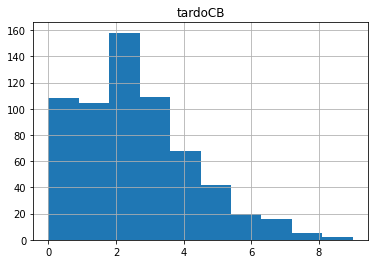

In [108]:
new.hist(column='tardoCB') 

Representacion de los alumnos que ya pasaron 

113

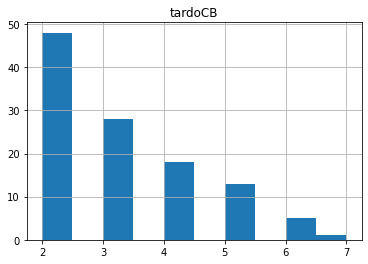

In [109]:
new2.hist(column='tardoCB') 
len(new2['tardoCB']) #cantidad de alumnos que ya pasaron CB

Media y Mediana en años

In [110]:
new2['tardoCB'].mean() 

3.1327433628318584

In [111]:
new2['tardoCB'].median()

3.0

In [112]:
#esto sirve para descargar en excel 
#from google.colab import files
#carrerafiltrada.to_csv('carrerafiltrada.csv')
#files.download('carrerafiltrada.csv')

#REGRESION LINEAL


In [113]:
from sklearn import linear_model, model_selection
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

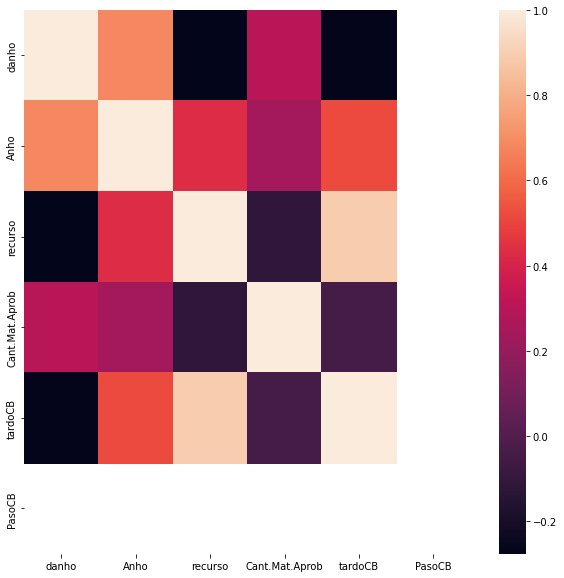

In [121]:
fig,ax= plt.subplots(figsize=(10,10))
sns.heatmap(new2.corr())

In [127]:
x=new2[['recurso','Anho',]].values
y=new2['tardoCB'].values

In [128]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.11,random_state=113)

In [129]:
LR = LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [130]:
len(X_test)

13

# PREDICCIONES

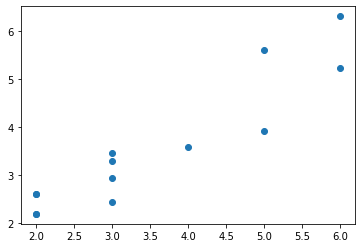

In [134]:
predictions = LR.predict(X_test)
plt.scatter(y_test,predictions)

## Regression Evaluation Metrics
**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

    **MAE** es el más fácil de entender, porque es el error promedio.
    **MSE** es más popular que MAE, porque MSE "castiga" los errores mayores, lo que tiende a ser útil en el mundo real.
    **RMSE** es aún más popular que la MSE, porque la RMSE es interpretable en las unidades "y".


In [132]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.4722407176926752
MSE: 0.2932734000612981
RMSE: 0.5415472279139633
